## Weather Dataset:

In [88]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import statistics

### Reading Weather data 
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [84]:
path = 'data/Weather/TORINO_GIARDINI_REALI_giornalieri_2020.csv'
to_gr_weather_data = pd.read_csv(path,  sep=';',parse_dates=['Data'])
#removing unamed column
to_gr_weather_data = to_gr_weather_data.loc[:, ~to_gr_weather_data.columns.str.contains('^Unnamed')]
#Removing empty column
to_gr_weather_data.dropna(how='all', axis=1, inplace=True)
to_gr_weather_data

,Data,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Neve Fresca ( cm ),Neve al Suolo ( cm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Radiazione totale ( MJ/mq )
0,2020-01-01,0.2,0.2,0,0,4.0,11.3,-0.2,82,99,48.0,4.6
1,2020-02-01,0.0,0.0,0,0,3.6,10.1,-0.4,82,99,50.0,4.6
2,2020-03-01,0.2,0.2,0,0,3.6,7.7,1.2,86,99,62.0,2.5
3,2020-04-01,0.0,0.0,0,0,5.5,12.8,0.4,73,99,41.0,5.3
4,2020-05-01,0.0,0.0,0,0,5.1,11.8,1.6,76,97,46.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,0.0,0.0,0,0,0.4,3.4,-2.6,82,93,66.0,3.0
362,2020-12-28,0.0,0.0,4,4,0.5,3.1,-1.9,91,100,75.0,2.4
363,2020-12-29,NaN,3.6,2,3,0.0,5.3,-3.6,92,100,64.0,3.3
364,2020-12-30,0.0,0.0,0,0,2.6,7.5,-1.1,81,100,54.0,4.0


### Multi-Line plot

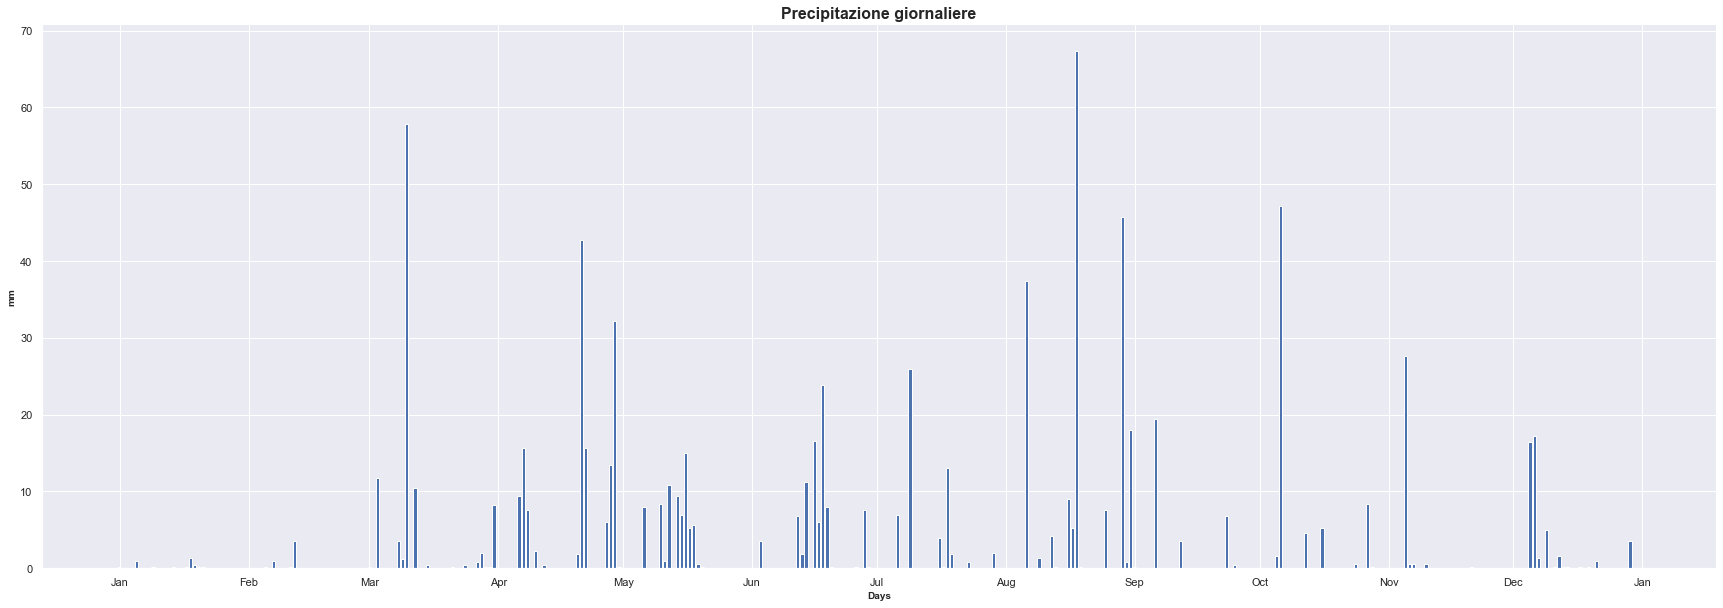

In [92]:
#set seaborn grapichs theme
sns.set_theme()

plt.figure(figsize=(30, 10))

columns = [c for c in list(to_gr_weather_data.columns) if c != 'Data']

plt.bar(to_gr_weather_data["Data"], to_gr_weather_data["Precipitazione dalle 0 alle 0 ( mm )"])
plt.xlabel('Days',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel('mm',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.title("Precipitazione giornaliere",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
ax = plt.gca()
X = ax.xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
ax.grid(True)
sns.despine()
plt.show()

### Small multiples

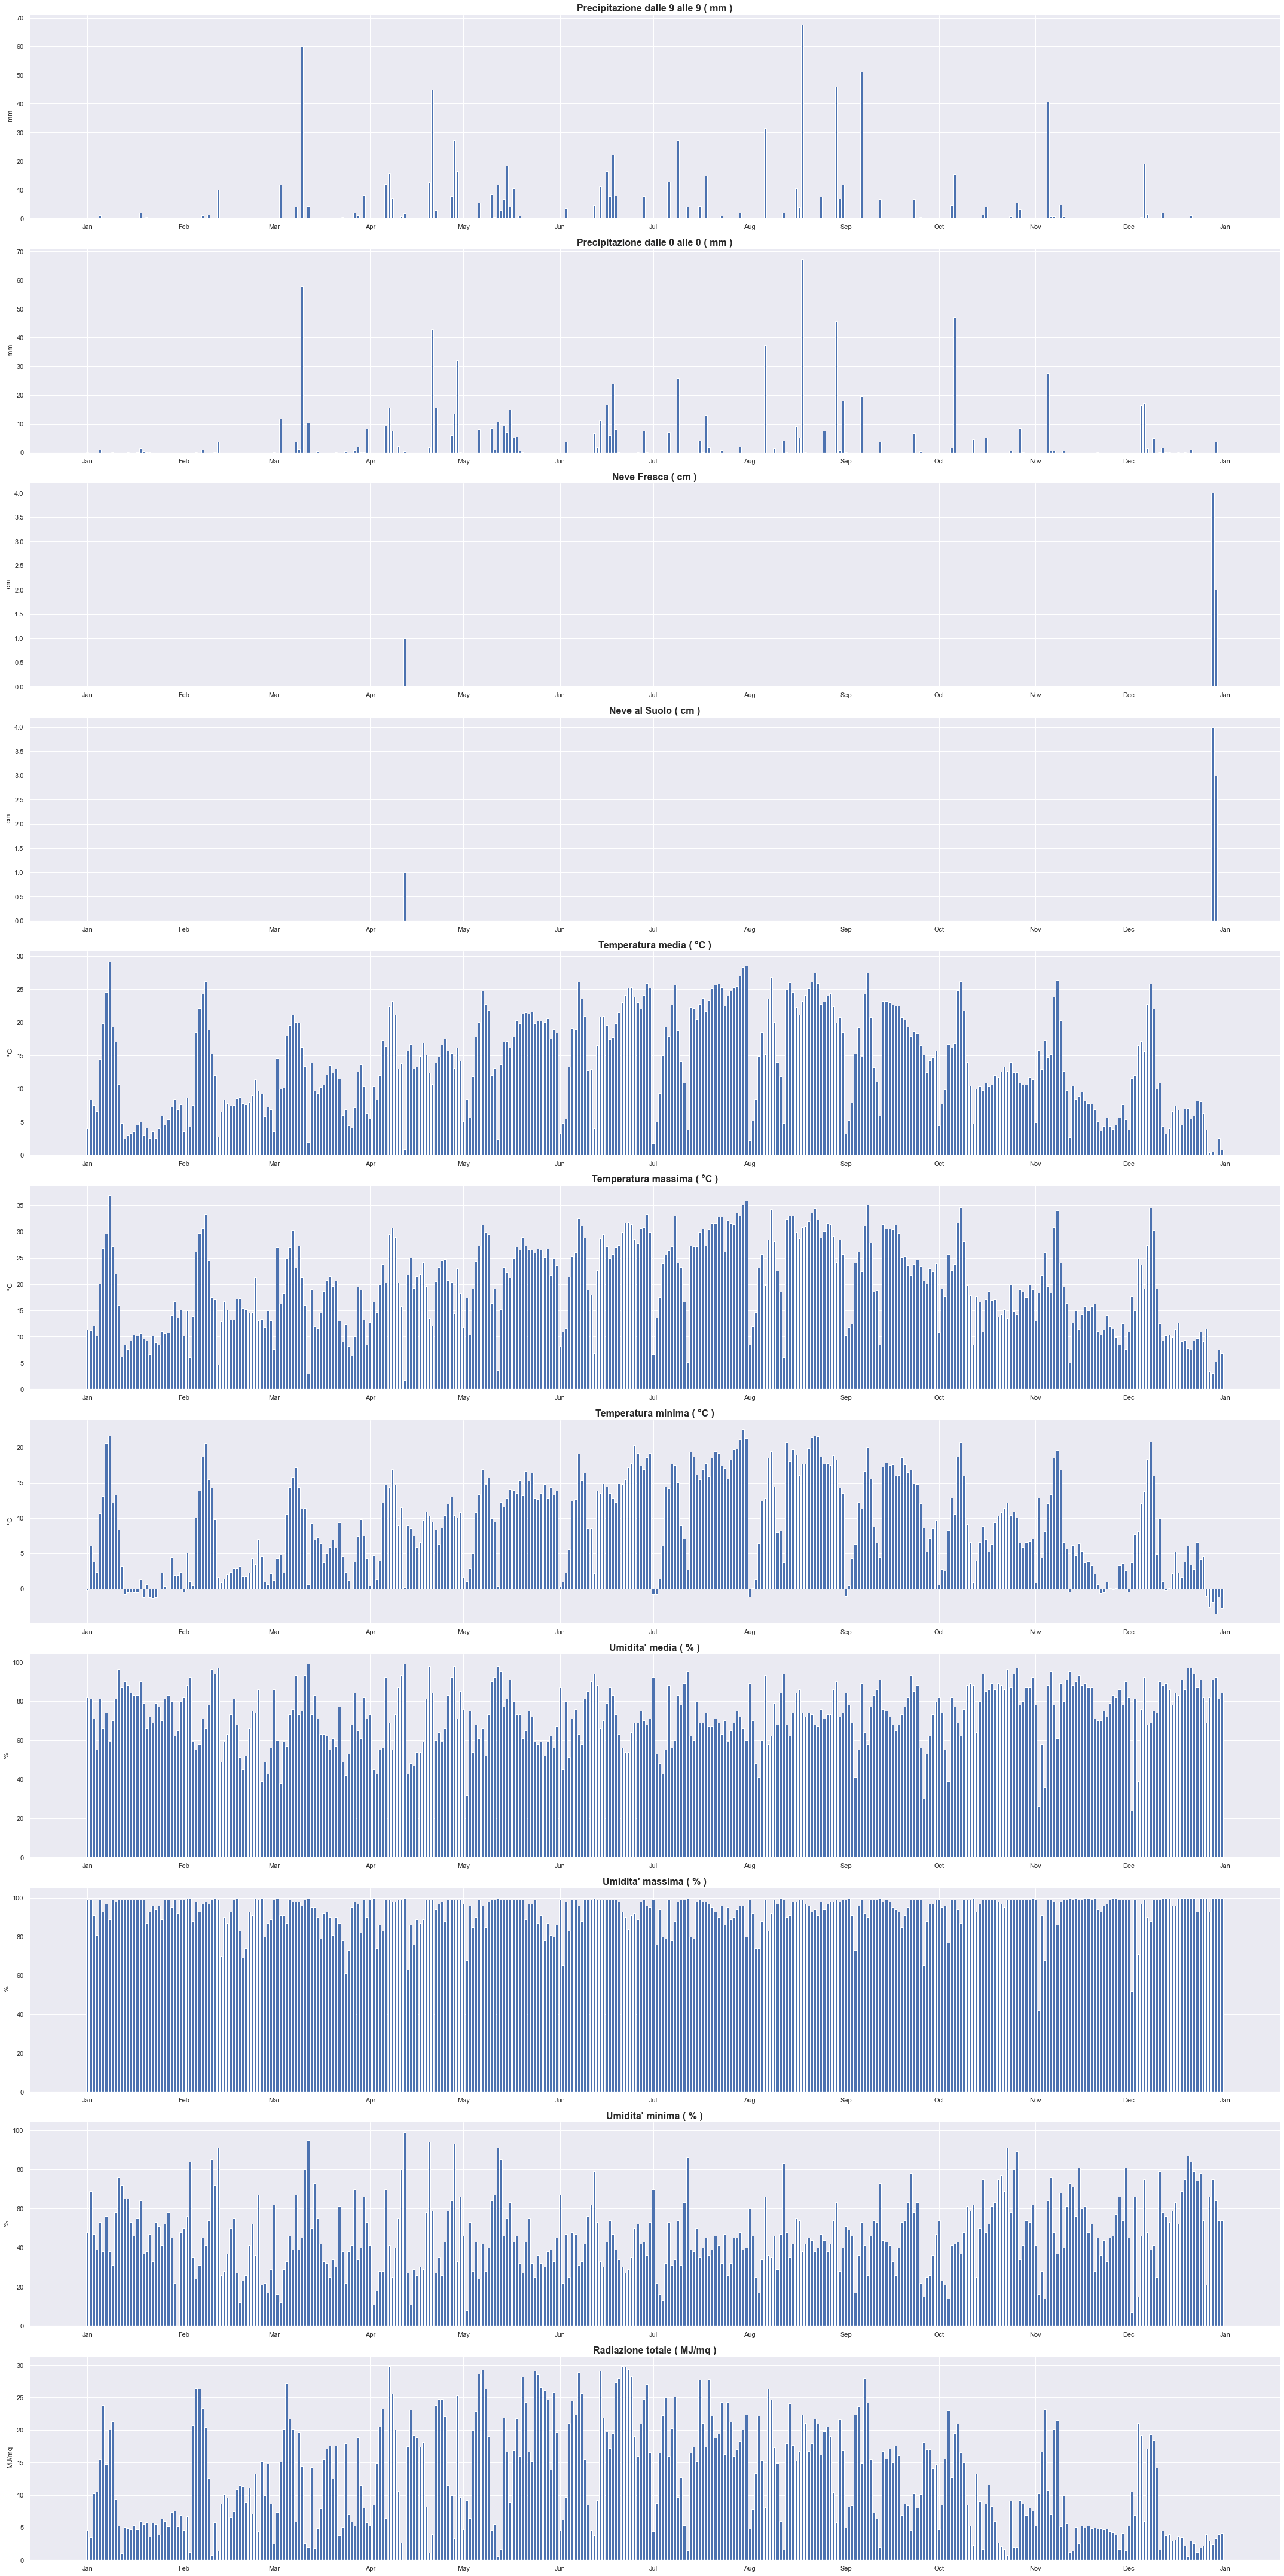

In [106]:
fig,ax=plt.subplots(nrows=11,ncols=1, figsize=(30,60))

num = 0
for c in columns: 
    
    ax[num].bar(to_gr_weather_data['Data'],to_gr_weather_data[c])
    ax[num].set_ylabel(c.split("(",1)[1].split(" )",1)[0])    
    ax[num].set_title(c, fontdict= { 'fontsize': 16, 'fontweight':'bold'})

    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format - %b gives us Jan, Feb...
    fmt = mdates.DateFormatter('%b')
    X = ax[num].xaxis
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)
    ax[num].grid(True)
    num+=1

#ax[num-1].set_xlabel("Days")    
    
sns.despine()
# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()
plt.show()